In [1]:
import json
import pandas as pd
import copy
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.path.join('./','../pyunet'))
from lib.unet import UNet
from modules.train import Train
import torch
from lib.utils import get_image, get_mask, get_predicted_img, dice_score, count_parameters
import glob
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
img_dir  = "./images/covid19ctscandlmulti/images/"
mask_dir = "./images/covid19ctscandlmulti/masks/"

tmp_dir = "./tmp"

if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)

train_images_dir = "./tmp/train/images/"
train_masks_dir  = "./tmp/train/masks/"

test_images_dir  = "./tmp/test/images/"
test_masks_dir   = "./tmp/test/masks/"

os.makedirs(train_images_dir)
os.makedirs(train_masks_dir)
os.makedirs(test_images_dir)
os.makedirs(test_masks_dir)

images = sorted(glob.glob("{}/*".format(img_dir)))
masks  = sorted(glob.glob("{}/*".format(mask_dir)))

train_images, test_images, train_masks, test_masks = train_test_split(
    images,
    masks,
    test_size=0.3,
    random_state=42
)

for img_file in train_images:
    shutil.copy(img_file, train_images_dir)
    
for img_file in train_masks:
    shutil.copy(img_file, train_masks_dir)
    
for img_file in test_images:
    shutil.copy(img_file, test_images_dir)
    
for img_file in test_masks:
    shutil.copy(img_file, test_masks_dir)
    
    

In [3]:
img_height     = 128
img_width      = 128
device         = 'cuda'
gpu_index      = 0
input_img_dir  = train_images_dir
input_mask_dir = train_masks_dir
model_file     = "test.pth"
epochs         = 100
learning_rate  = 1e-005
in_channels    = 3
out_channels   = 4
batch_size     = 1
loss_type      = 'CE'
model_type     = 'unet_rd'

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNetRd(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): NormalizedDoubleConv(
      (first_conv): DepthwiseSeperableConv(
        (depthwise): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=1024, bias=False)
        (pointwise): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (first_norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (first_actv): ReLU6(inplace=True)
      (second_conv): DepthwiseSeperableConv(
        (depthwise): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=512, bias=False)
        (pointwise): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (second_norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_runni

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.14it/s, loss=0.709]


Ave Loss: 0.866467478445598
Ave Accuracy: 0.7268330891927083
Ave F1: 0.3021187675372566
Ave Precision: 0.3214376609532766
Ave Recall: 0.6411405403029599
Ave Specificity: 0.6411405403029599
Saving model to test.pth...
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.91it/s, loss=0.608]


Ave Loss: 0.7051409776721682
Ave Accuracy: 0.7803873697916667
Ave F1: 0.3321129161681519
Ave Precision: 0.34503032086769336
Ave Recall: 0.6687188436115891
Ave Specificity: 0.6687188436115891
Saving model to test.pth...
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.12it/s, loss=0.517]


Ave Loss: 0.6182629155261176
Ave Accuracy: 0.81937255859375
Ave F1: 0.352514750472637
Ave Precision: 0.3620250535389145
Ave Recall: 0.678308879155088
Ave Specificity: 0.678308879155088
Saving model to test.pth...
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.72it/s, loss=0.446]


Ave Loss: 0.5427195387227195
Ave Accuracy: 0.8443400065104166
Ave F1: 0.3599587341014036
Ave Precision: 0.3689446220223662
Ave Recall: 0.6815396910498541
Ave Specificity: 0.6815396910498541
Saving model to test.pth...
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.24it/s, loss=0.388]


Ave Loss: 0.47867183706590105
Ave Accuracy: 0.8613667805989583
Ave F1: 0.36264634765677517
Ave Precision: 0.37218447115491454
Ave Recall: 0.6795014958968145
Ave Specificity: 0.6795014958968145
Saving model to test.pth...
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.34it/s, loss=0.341]


Ave Loss: 0.41722834216696875
Ave Accuracy: 0.87320556640625
Ave F1: 0.36210996036726034
Ave Precision: 0.37188254984253805
Ave Recall: 0.6696276227346131
Ave Specificity: 0.6696276227346131
Saving model to test.pth...
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.34it/s, loss=0.318]


Ave Loss: 0.3660768302423613
Ave Accuracy: 0.8777811686197917
Ave F1: 0.3627901117862681
Ave Precision: 0.3752825667707776
Ave Recall: 0.665259972599912
Ave Specificity: 0.665259972599912
Saving model to test.pth...
Epoch: 7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.31it/s, loss=0.27]


Ave Loss: 0.3282527152981077
Ave Accuracy: 0.882427978515625
Ave F1: 0.36554119988566447
Ave Precision: 0.3779667916861201
Ave Recall: 0.6677245881176556
Ave Specificity: 0.6677245881176556
Saving model to test.pth...
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.44it/s, loss=0.238]


Ave Loss: 0.2922622635960579
Ave Accuracy: 0.889385986328125
Ave F1: 0.3676260130156503
Ave Precision: 0.3843580248657383
Ave Recall: 0.6645407597567811
Ave Specificity: 0.6645407597567811
Saving model to test.pth...
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.48it/s, loss=0.218]


Ave Loss: 0.2611603837992464
Ave Accuracy: 0.8950297037760416
Ave F1: 0.37232965757284125
Ave Precision: 0.3913869241320421
Ave Recall: 0.6640617200749711
Ave Specificity: 0.6640617200749711
Saving model to test.pth...
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.89it/s, loss=0.194]


Ave Loss: 0.23580468467303684
Ave Accuracy: 0.8971659342447916
Ave F1: 0.37280660917942143
Ave Precision: 0.3917622336395674
Ave Recall: 0.6651420269155449
Ave Specificity: 0.6651420269155449
Saving model to test.pth...
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.06it/s, loss=0.176]


Ave Loss: 0.21432173858795847
Ave Accuracy: 0.8975748697916667
Ave F1: 0.3726247153390359
Ave Precision: 0.39328423136376783
Ave Recall: 0.6656043580967762
Ave Specificity: 0.6656043580967762
Saving model to test.pth...
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.92it/s, loss=0.164]


Ave Loss: 0.19598625132015773
Ave Accuracy: 0.8967325846354167
Ave F1: 0.3712462116297968
Ave Precision: 0.3924685352621219
Ave Recall: 0.6633653434638386
Ave Specificity: 0.6633653434638386
Saving model to test.pth...
Epoch: 13


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.63it/s, loss=0.15]


Ave Loss: 0.1807186667408262
Ave Accuracy: 0.8967488606770834
Ave F1: 0.3728228638403856
Ave Precision: 0.3951351399165424
Ave Recall: 0.6644307750559292
Ave Specificity: 0.6644307750559292
Saving model to test.pth...
Epoch: 14


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.74it/s, loss=0.14]


Ave Loss: 0.16791538649371693
Ave Accuracy: 0.89700927734375
Ave F1: 0.37520390956681937
Ave Precision: 0.3978924853652432
Ave Recall: 0.6677188533306957
Ave Specificity: 0.6677188533306957
Saving model to test.pth...
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.16it/s, loss=0.132]


Ave Loss: 0.1569080585879939
Ave Accuracy: 0.898809814453125
Ave F1: 0.37779116435995314
Ave Precision: 0.39971207372324363
Ave Recall: 0.6724630536108452
Ave Specificity: 0.6724630536108452
Saving model to test.pth...
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.97it/s, loss=0.128]


Ave Loss: 0.1474716600562845
Ave Accuracy: 0.89886474609375
Ave F1: 0.3809898399287797
Ave Precision: 0.40076827179161406
Ave Recall: 0.6798861275394414
Ave Specificity: 0.6798861275394414
Saving model to test.pth...
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.31it/s, loss=0.123]


Ave Loss: 0.14007421412638255
Ave Accuracy: 0.8951131184895833
Ave F1: 0.3851213291560285
Ave Precision: 0.40077143622506395
Ave Recall: 0.6895076959678846
Ave Specificity: 0.6895076959678846
Saving model to test.pth...
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.74it/s, loss=0.117]


Ave Loss: 0.13467287155134336
Ave Accuracy: 0.8922892252604167
Ave F1: 0.39036459506138477
Ave Precision: 0.4016627864351333
Ave Recall: 0.7008795208631445
Ave Specificity: 0.7008795208631445
Saving model to test.pth...
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.09it/s, loss=0.104]


Ave Loss: 0.13133871991719517
Ave Accuracy: 0.9021402994791666
Ave F1: 0.38696920015555075
Ave Precision: 0.409994172576546
Ave Recall: 0.6860042330999332
Ave Specificity: 0.6860042330999332
Saving model to test.pth...
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.03it/s, loss=0.102]


Ave Loss: 0.12185768160436834
Ave Accuracy: 0.9068257649739583
Ave F1: 0.37910786807982383
Ave Precision: 0.4138823273126538
Ave Recall: 0.6671580242977624
Ave Specificity: 0.6671580242977624
Saving model to test.pth...
Epoch: 21


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.77it/s, loss=0.0914]


Ave Loss: 0.1097663091229541
Ave Accuracy: 0.9063090006510417
Ave F1: 0.38627516259952094
Ave Precision: 0.41042045031308205
Ave Recall: 0.6783577922142927
Ave Specificity: 0.6783577922142927
Saving model to test.pth...
Epoch: 22


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.35it/s, loss=0.0857]


Ave Loss: 0.10146342923066445
Ave Accuracy: 0.9050130208333333
Ave F1: 0.3868694658957599
Ave Precision: 0.4094318074709654
Ave Recall: 0.679197425612564
Ave Specificity: 0.679197425612564
Saving model to test.pth...
Epoch: 23


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.27it/s, loss=0.0808]


Ave Loss: 0.09518136182533843
Ave Accuracy: 0.9043070475260416
Ave F1: 0.3850084436432082
Ave Precision: 0.40787406915079855
Ave Recall: 0.6765726905977658
Ave Specificity: 0.6765726905977658
Saving model to test.pth...
Epoch: 24


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.60it/s, loss=0.0765]


Ave Loss: 0.08965150889541422
Ave Accuracy: 0.90355224609375
Ave F1: 0.38475954651978983
Ave Precision: 0.4073527611735527
Ave Recall: 0.6766348577656959
Ave Specificity: 0.6766348577656959
Saving model to test.pth...
Epoch: 25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.31it/s, loss=0.0727]


Ave Loss: 0.0847393982644592
Ave Accuracy: 0.9034098307291667
Ave F1: 0.38446303618607874
Ave Precision: 0.40769632014459456
Ave Recall: 0.6749964921309257
Ave Specificity: 0.6749964921309257
Saving model to test.pth...
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.49it/s, loss=0.069]


Ave Loss: 0.0802995378151536
Ave Accuracy: 0.902984619140625
Ave F1: 0.3842020803187195
Ave Precision: 0.40725235175092844
Ave Recall: 0.6753460865467156
Ave Specificity: 0.6753460865467156
Saving model to test.pth...
Epoch: 27


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.32it/s, loss=0.0658]


Ave Loss: 0.07618123779871634
Ave Accuracy: 0.9030192057291667
Ave F1: 0.3845646123473733
Ave Precision: 0.4098711003113214
Ave Recall: 0.6751891844096005
Ave Specificity: 0.6751891844096005
Saving model to test.pth...
Epoch: 28


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.33it/s, loss=0.0627]


Ave Loss: 0.07246746423521212
Ave Accuracy: 0.9027201334635416
Ave F1: 0.38375620856342146
Ave Precision: 0.4083496216047556
Ave Recall: 0.6744350829983499
Ave Specificity: 0.6744350829983499
Saving model to test.pth...
Epoch: 29


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.09it/s, loss=0.06]


Ave Loss: 0.06903898574944053
Ave Accuracy: 0.9024556477864584
Ave F1: 0.38328663369309673
Ave Precision: 0.4078647537913683
Ave Recall: 0.6725533594630123
Ave Specificity: 0.6725533594630123
Saving model to test.pth...
Epoch: 30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.93it/s, loss=0.0573]


Ave Loss: 0.06586244995040554
Ave Accuracy: 0.903033447265625
Ave F1: 0.3842938158204957
Ave Precision: 0.41091965805867153
Ave Recall: 0.6725196201629912
Ave Specificity: 0.6725196201629912
Saving model to test.pth...
Epoch: 31


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.27it/s, loss=0.0549]


Ave Loss: 0.06291342146162476
Ave Accuracy: 0.9033528645833333
Ave F1: 0.38476144081101427
Ave Precision: 0.41224804906951124
Ave Recall: 0.6734866692922997
Ave Specificity: 0.6734866692922997
Saving model to test.pth...
Epoch: 32


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.46it/s, loss=0.0524]


Ave Loss: 0.06012986746749708
Ave Accuracy: 0.903924560546875
Ave F1: 0.3848618121091422
Ave Precision: 0.41317713028854514
Ave Recall: 0.6725186211880132
Ave Specificity: 0.6725186211880132
Saving model to test.pth...
Epoch: 33


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.97it/s, loss=0.0502]


Ave Loss: 0.057498365747077125
Ave Accuracy: 0.9048848470052083
Ave F1: 0.38549425728859515
Ave Precision: 0.4170792288159003
Ave Recall: 0.6726036978456944
Ave Specificity: 0.6726036978456944
Saving model to test.pth...
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.57it/s, loss=0.048]


Ave Loss: 0.054992562891649346
Ave Accuracy: 0.9046915690104167
Ave F1: 0.38479101269297755
Ave Precision: 0.41272972048037837
Ave Recall: 0.6713905824217791
Ave Specificity: 0.6713905824217791
Saving model to test.pth...
Epoch: 35


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.13it/s, loss=0.0461]


Ave Loss: 0.05268781034808074
Ave Accuracy: 0.905029296875
Ave F1: 0.3871900454164221
Ave Precision: 0.4192158360335815
Ave Recall: 0.6704523113799211
Ave Specificity: 0.6704523113799211
Saving model to test.pth...
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.64it/s, loss=0.044]


Ave Loss: 0.05039757526080523
Ave Accuracy: 0.9032185872395834
Ave F1: 0.38957274413642096
Ave Precision: 0.4183227841967907
Ave Recall: 0.6656620740082057
Ave Specificity: 0.6688048425649442
Saving model to test.pth...
Epoch: 37


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.24it/s, loss=0.0423]


Ave Loss: 0.04833785598831517
Ave Accuracy: 0.9039388020833333
Ave F1: 0.3917429764710703
Ave Precision: 0.428101675632193
Ave Recall: 0.6637826623950038
Ave Specificity: 0.6670745207522866
Saving model to test.pth...
Epoch: 38


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.43it/s, loss=0.0409]


Ave Loss: 0.046519326338810583
Ave Accuracy: 0.9034383138020833
Ave F1: 0.39568208551273987
Ave Precision: 0.4280441324033416
Ave Recall: 0.6597952838085978
Ave Specificity: 0.6638966029152262
Saving model to test.pth...
Epoch: 39


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.09it/s, loss=0.0396]


Ave Loss: 0.04475761935380953
Ave Accuracy: 0.9050516764322917
Ave F1: 0.4026490838941526
Ave Precision: 0.44841559461121
Ave Recall: 0.6539818764926234
Ave Specificity: 0.6644788184738554
Saving model to test.pth...
Epoch: 40


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.96it/s, loss=0.0378]


Ave Loss: 0.042964793515524694
Ave Accuracy: 0.9063578287760417
Ave F1: 0.4024528254721346
Ave Precision: 0.45565308436965263
Ave Recall: 0.6541476881839681
Ave Specificity: 0.6642704642612335
Saving model to test.pth...
Epoch: 41


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.81it/s, loss=0.0367]


Ave Loss: 0.041355033298688275
Ave Accuracy: 0.9043782552083334
Ave F1: 0.39050564003876154
Ave Precision: 0.45172654300792636
Ave Recall: 0.6569826159612432
Ave Specificity: 0.660245787915102
Saving model to test.pth...
Epoch: 42


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.76it/s, loss=0.0353]


Ave Loss: 0.03964730470574328
Ave Accuracy: 0.9014567057291667
Ave F1: 0.3885431201793161
Ave Precision: 0.4511036392750842
Ave Recall: 0.6498383920686733
Ave Specificity: 0.6557500864599317
Saving model to test.pth...
Epoch: 43


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.59it/s, loss=0.0337]


Ave Loss: 0.03825028158192124
Ave Accuracy: 0.90465087890625
Ave F1: 0.39933794351179885
Ave Precision: 0.4534256105810622
Ave Recall: 0.6506891122049059
Ave Specificity: 0.6595860476281302
Saving model to test.pth...
Epoch: 44


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.82it/s, loss=0.0324]


Ave Loss: 0.03745401725172996
Ave Accuracy: 0.9074808756510416
Ave F1: 0.39458120781250006
Ave Precision: 0.44051273883293984
Ave Recall: 0.6600339963019332
Ave Specificity: 0.6634578287809137
Saving model to test.pth...
Epoch: 45


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.49it/s, loss=0.0312]


Ave Loss: 0.03665762727281877
Ave Accuracy: 0.90772705078125
Ave F1: 0.38269529412537323
Ave Precision: 0.43257002032044733
Ave Recall: 0.6574725694949094
Ave Specificity: 0.6574725694949094
Saving model to test.pth...
Epoch: 46


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.54it/s, loss=0.0344]


Ave Loss: 0.03616881394492728
Ave Accuracy: 0.9089274088541667
Ave F1: 0.4004893739928551
Ave Precision: 0.442516595410372
Ave Recall: 0.6785446635362862
Ave Specificity: 0.6817338191605432
Saving model to test.pth...
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.08it/s, loss=0.032]


Ave Loss: 0.0351706319488585
Ave Accuracy: 0.9071818033854167
Ave F1: 0.4276267307704951
Ave Precision: 0.4434456596264324
Ave Recall: 0.6930493946744422
Ave Specificity: 0.7012128451294611
Saving model to test.pth...
Epoch: 48


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.95it/s, loss=0.0305]


Ave Loss: 0.03548027543084962
Ave Accuracy: 0.9008382161458334
Ave F1: 0.3905893099585123
Ave Precision: 0.422641506361864
Ave Recall: 0.6699994070271587
Ave Specificity: 0.6734680017323067
Saving model to test.pth...
Epoch: 49


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.96it/s, loss=0.0294]


Ave Loss: 0.03297409288186048
Ave Accuracy: 0.9077616373697917
Ave F1: 0.4020681738180819
Ave Precision: 0.46391700779536926
Ave Recall: 0.6458044730069118
Ave Specificity: 0.6565544875271427
Saving model to test.pth...
Epoch: 50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.64it/s, loss=0.0263]


Ave Loss: 0.0297918707997139
Ave Accuracy: 0.91429443359375
Ave F1: 0.4242192694318611
Ave Precision: 0.48488109484505254
Ave Recall: 0.649703666394259
Ave Specificity: 0.6661052153960092
Saving model to test.pth...
Epoch: 51


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.42it/s, loss=0.0248]


Ave Loss: 0.027615407089303646
Ave Accuracy: 0.9129984537760417
Ave F1: 0.4261235291258992
Ave Precision: 0.4765295590085854
Ave Recall: 0.6563050466378836
Ave Specificity: 0.670316979115234
Saving model to test.pth...
Epoch: 52


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.99it/s, loss=0.0237]


Ave Loss: 0.02613634162449411
Ave Accuracy: 0.912274169921875
Ave F1: 0.42246524528423574
Ave Precision: 0.4720099991885791
Ave Recall: 0.6631245237091317
Ave Specificity: 0.6724640281012376
Saving model to test.pth...
Epoch: 53


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.16it/s, loss=0.0229]


Ave Loss: 0.024985286693221757
Ave Accuracy: 0.9121866861979167
Ave F1: 0.42954724529497756
Ave Precision: 0.47991532096986
Ave Recall: 0.6573171482464112
Ave Specificity: 0.6720101295756741
Saving model to test.pth...
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.46it/s, loss=0.022]


Ave Loss: 0.023958598070644908
Ave Accuracy: 0.911163330078125
Ave F1: 0.4323164945472879
Ave Precision: 0.4825061063835048
Ave Recall: 0.6505361417996244
Ave Specificity: 0.671380469382654
Saving model to test.pth...
Epoch: 55


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.22it/s, loss=0.0212]


Ave Loss: 0.023008819110691546
Ave Accuracy: 0.91016845703125
Ave F1: 0.42299344348162077
Ave Precision: 0.47155055477565927
Ave Recall: 0.6528172666887382
Ave Specificity: 0.6675101627609994
Saving model to test.pth...
Epoch: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.79it/s, loss=0.0205]


Ave Loss: 0.022144620433183652
Ave Accuracy: 0.9087259928385417
Ave F1: 0.4159525901236859
Ave Precision: 0.46470406356906463
Ave Recall: 0.6545115906921138
Ave Specificity: 0.6666884265406299
Saving model to test.pth...
Epoch: 57


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.89it/s, loss=0.0198]


Ave Loss: 0.021397656900808214
Ave Accuracy: 0.9086812337239584
Ave F1: 0.4127728071673024
Ave Precision: 0.45874968401891747
Ave Recall: 0.6595161484693773
Ave Specificity: 0.6673936289335166
Saving model to test.pth...
Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.60it/s, loss=0.0192]


Ave Loss: 0.020730422370667967
Ave Accuracy: 0.9069173177083333
Ave F1: 0.4078593853835482
Ave Precision: 0.4482384622615033
Ave Recall: 0.6547673201559231
Ave Specificity: 0.6634763237429154
Saving model to test.pth...
Epoch: 59


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.43it/s, loss=0.0187]


Ave Loss: 0.020014723862654397
Ave Accuracy: 0.9075948079427083
Ave F1: 0.41293498862031736
Ave Precision: 0.4530533881514776
Ave Recall: 0.652511028841953
Ave Specificity: 0.6664729537923255
Saving model to test.pth...
Epoch: 60


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.39it/s, loss=0.0181]


Ave Loss: 0.019277575804984997
Ave Accuracy: 0.9064371744791667
Ave F1: 0.41478782680233434
Ave Precision: 0.45281070835087445
Ave Recall: 0.6530317484787882
Ave Specificity: 0.6635329916318192
Saving model to test.pth...
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.99it/s, loss=0.018]


Ave Loss: 0.01866085640420871
Ave Accuracy: 0.90728759765625
Ave F1: 0.43365152625600395
Ave Precision: 0.4760935666836831
Ave Recall: 0.6407248599256413
Ave Specificity: 0.6634415817335951
Saving model to test.pth...
Epoch: 62


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.30it/s, loss=0.0186]


Ave Loss: 0.018124539564762798
Ave Accuracy: 0.90487060546875
Ave F1: 0.41947810677745234
Ave Precision: 0.48499973081042574
Ave Recall: 0.6071049536334521
Ave Specificity: 0.6436585768045546
Saving model to test.pth...
Epoch: 63


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.99it/s, loss=0.0169]


Ave Loss: 0.017785295118976918
Ave Accuracy: 0.904388427734375
Ave F1: 0.3961435471453453
Ave Precision: 0.4608405429182182
Ave Recall: 0.6187882712847584
Ave Specificity: 0.6435130229445553
Saving model to test.pth...
Epoch: 64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.81it/s, loss=0.0175]


Ave Loss: 0.017578036331438594
Ave Accuracy: 0.9088948567708334
Ave F1: 0.4396832165167306
Ave Precision: 0.49217562243076657
Ave Recall: 0.6366962087444521
Ave Specificity: 0.6652136214657617
Saving model to test.pth...
Epoch: 65


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.95it/s, loss=0.0162]


Ave Loss: 0.01676172438809382
Ave Accuracy: 0.9126444498697917
Ave F1: 0.44561661574946354
Ave Precision: 0.4881274530272873
Ave Recall: 0.6634721673454682
Ave Specificity: 0.681913894810339
Saving model to test.pth...
Epoch: 66


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.19it/s, loss=0.0151]


Ave Loss: 0.015893168810621968
Ave Accuracy: 0.9087483723958333
Ave F1: 0.4300235610868416
Ave Precision: 0.46186036083882975
Ave Recall: 0.6633856363508596
Ave Specificity: 0.677722149857591
Saving model to test.pth...
Epoch: 67


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.13it/s, loss=0.0147]


Ave Loss: 0.015186326132555094
Ave Accuracy: 0.9074869791666667
Ave F1: 0.4256201139733662
Ave Precision: 0.4604607837417008
Ave Recall: 0.6484969769141564
Ave Specificity: 0.6672592425771768
Saving model to test.pth...
Epoch: 68


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.43it/s, loss=0.0145]


Ave Loss: 0.014634576453162091
Ave Accuracy: 0.9091206868489583
Ave F1: 0.4360307296663995
Ave Precision: 0.47954229647432106
Ave Recall: 0.6517733783159236
Ave Specificity: 0.6732347640406773
Saving model to test.pth...
Epoch: 69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.61it/s, loss=0.0143]


Ave Loss: 0.014142291956315084
Ave Accuracy: 0.9120585123697916
Ave F1: 0.4464247026289739
Ave Precision: 0.4788926895449374
Ave Recall: 0.6628015071662539
Ave Specificity: 0.6821802358733824
Saving model to test.pth...
Epoch: 70


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.40it/s, loss=0.0137]


Ave Loss: 0.013691744211662029
Ave Accuracy: 0.9115824381510417
Ave F1: 0.4397275495078096
Ave Precision: 0.4669728941444987
Ave Recall: 0.6725124621242019
Ave Specificity: 0.6865865159334695
Saving model to test.pth...
Epoch: 71


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.78it/s, loss=0.0134]


Ave Loss: 0.013405666969317411
Ave Accuracy: 0.9114969889322917
Ave F1: 0.43637936019239965
Ave Precision: 0.46623519890314363
Ave Recall: 0.6763926570042768
Ave Specificity: 0.6867862603954268
Saving model to test.pth...
Epoch: 72


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.57it/s, loss=0.0131]


Ave Loss: 0.01305301444871085
Ave Accuracy: 0.9087239583333333
Ave F1: 0.4291095738630564
Ave Precision: 0.4592489238895368
Ave Recall: 0.6721477810936396
Ave Specificity: 0.6815096438766877
Saving model to test.pth...
Epoch: 73


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.20it/s, loss=0.0128]


Ave Loss: 0.01270035401851471
Ave Accuracy: 0.9091898600260416
Ave F1: 0.43887259998327915
Ave Precision: 0.481506344095962
Ave Recall: 0.6718284847706804
Ave Specificity: 0.6839452049766818
Saving model to test.pth...
Epoch: 74


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.37it/s, loss=0.0126]


Ave Loss: 0.012386105751751789
Ave Accuracy: 0.909698486328125
Ave F1: 0.42495434219387396
Ave Precision: 0.4689203390544694
Ave Recall: 0.6757690456013922
Ave Specificity: 0.6865319306420715
Saving model to test.pth...
Epoch: 75


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.85it/s, loss=0.0119]


Ave Loss: 0.012006601275477027
Ave Accuracy: 0.9103597005208334
Ave F1: 0.440022530659347
Ave Precision: 0.47335083054849814
Ave Recall: 0.6860092222541366
Ave Specificity: 0.6985253855166197
Saving model to test.pth...
Epoch: 76


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.89it/s, loss=0.0113]


Ave Loss: 0.01162989690201357
Ave Accuracy: 0.9111714680989583
Ave F1: 0.4394235533906207
Ave Precision: 0.47850544356417246
Ave Recall: 0.681208280810426
Ave Specificity: 0.6933740552985984
Saving model to test.pth...
Epoch: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.63it/s, loss=0.0112]


Ave Loss: 0.011290743740807687
Ave Accuracy: 0.91353759765625
Ave F1: 0.438352439475446
Ave Precision: 0.48775569548836123
Ave Recall: 0.658953184307816
Ave Specificity: 0.6762901138286916
Saving model to test.pth...
Epoch: 78


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.04it/s, loss=0.0109]


Ave Loss: 0.010952087551621454
Ave Accuracy: 0.9134745279947917
Ave F1: 0.4393350413462854
Ave Precision: 0.4922701284822864
Ave Recall: 0.6448031214983818
Ave Specificity: 0.6669899951570883
Saving model to test.pth...
Epoch: 79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.40it/s, loss=0.0108]


Ave Loss: 0.010781891176676644
Ave Accuracy: 0.9135762532552083
Ave F1: 0.438360809811064
Ave Precision: 0.48476341260370137
Ave Recall: 0.6538329980028655
Ave Specificity: 0.6746668484882292
Saving model to test.pth...
Epoch: 80


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.21it/s, loss=0.0111]


Ave Loss: 0.01051874724715682
Ave Accuracy: 0.9126668294270833
Ave F1: 0.46558385206182357
Ave Precision: 0.504406520654745
Ave Recall: 0.6661175217381907
Ave Specificity: 0.6922284682310705
Saving model to test.pth...
Epoch: 81


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.33it/s, loss=0.0104]


Ave Loss: 0.0101229870725157
Ave Accuracy: 0.9091471354166667
Ave F1: 0.42642346929973773
Ave Precision: 0.5084760922589621
Ave Recall: 0.649545517841254
Ave Specificity: 0.6708177448427279
Saving model to test.pth...
Epoch: 82


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.23it/s, loss=0.0101]


Ave Loss: 0.009609384202797498
Ave Accuracy: 0.9012044270833334
Ave F1: 0.3905171867781007
Ave Precision: 0.45990629213058587
Ave Recall: 0.6130316321241808
Ave Specificity: 0.6401094817414298
Saving model to test.pth...
Epoch: 83


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.94it/s, loss=0.00933]


Ave Loss: 0.009297229436093143
Ave Accuracy: 0.9040913899739583
Ave F1: 0.4041808933040523
Ave Precision: 0.4777755447654143
Ave Recall: 0.6181332171503836
Ave Specificity: 0.6457813969354865
Saving model to test.pth...
Epoch: 84


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.20it/s, loss=0.00941]


Ave Loss: 0.008966608202484037
Ave Accuracy: 0.9062764485677083
Ave F1: 0.4142667234801552
Ave Precision: 0.4873698468817459
Ave Recall: 0.631578774967157
Ave Specificity: 0.6580806794409494
Saving model to test.pth...
Epoch: 85


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.42it/s, loss=0.00885]


Ave Loss: 0.008446317440497555
Ave Accuracy: 0.9085978190104167
Ave F1: 0.4191772564619452
Ave Precision: 0.5139013202772641
Ave Recall: 0.6325592535001541
Ave Specificity: 0.6596137583957147
Saving model to test.pth...
Epoch: 86


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.68it/s, loss=0.00841]


Ave Loss: 0.007998702686745674
Ave Accuracy: 0.9105143229166667
Ave F1: 0.4174654231122906
Ave Precision: 0.5005327171262287
Ave Recall: 0.6308401381301557
Ave Specificity: 0.6531958246574437
Saving model to test.pth...
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.06it/s, loss=0.008]


Ave Loss: 0.007662523062234478
Ave Accuracy: 0.9114705403645833
Ave F1: 0.42597575294072826
Ave Precision: 0.4893659156617904
Ave Recall: 0.6538184186874095
Ave Specificity: 0.6680526104219449
Saving model to test.pth...
Epoch: 88


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.43it/s, loss=0.00774]


Ave Loss: 0.007356157750889126
Ave Accuracy: 0.9109130859375
Ave F1: 0.4372917750544608
Ave Precision: 0.48956061032693865
Ave Recall: 0.6613439608050037
Ave Specificity: 0.6781991187672818
Saving model to test.pth...
Epoch: 89


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.62it/s, loss=0.00734]


Ave Loss: 0.007088422933260777
Ave Accuracy: 0.9082010904947917
Ave F1: 0.4153788604994306
Ave Precision: 0.4772603191605092
Ave Recall: 0.6576386587456798
Ave Specificity: 0.6679484775658724
Saving model to test.pth...
Epoch: 90


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.12it/s, loss=0.00709]


Ave Loss: 0.006858381831053911
Ave Accuracy: 0.9065104166666667
Ave F1: 0.4078534700071349
Ave Precision: 0.4691157323677577
Ave Recall: 0.6464023510508891
Ave Specificity: 0.660464886719651
Saving model to test.pth...
Epoch: 91


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.92it/s, loss=0.00682]


Ave Loss: 0.006641060212859884
Ave Accuracy: 0.907403564453125
Ave F1: 0.4223234772310732
Ave Precision: 0.48041237741098525
Ave Recall: 0.6457006658547361
Ave Specificity: 0.6651883001923402
Saving model to test.pth...
Epoch: 92


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.12it/s, loss=0.00665]


Ave Loss: 0.0064115576595733205
Ave Accuracy: 0.9089497884114583
Ave F1: 0.41922848656483197
Ave Precision: 0.47431620574981537
Ave Recall: 0.6532388314356711
Ave Specificity: 0.6668488331181227
Saving model to test.pth...
Epoch: 93


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.92it/s, loss=0.00637]


Ave Loss: 0.006188257442720766
Ave Accuracy: 0.9084859212239583
Ave F1: 0.4138157706238607
Ave Precision: 0.4824820203257721
Ave Recall: 0.6386128377226435
Ave Specificity: 0.6612911285666419
Saving model to test.pth...
Epoch: 94


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.04it/s, loss=0.0062]


Ave Loss: 0.00598481019177208
Ave Accuracy: 0.9082499186197917
Ave F1: 0.4167373680803079
Ave Precision: 0.49505206480485386
Ave Recall: 0.6204249752144638
Ave Specificity: 0.6483547569517393
Saving model to test.pth...
Epoch: 95


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.15it/s, loss=0.00596]


Ave Loss: 0.005808989838364401
Ave Accuracy: 0.9083333333333333
Ave F1: 0.41170489603706456
Ave Precision: 0.48632199444085555
Ave Recall: 0.6277610676405216
Ave Specificity: 0.6513627337724212
Saving model to test.pth...
Epoch: 96


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.98it/s, loss=0.00585]


Ave Loss: 0.005632303439779207
Ave Accuracy: 0.9107666015625
Ave F1: 0.4345911578392417
Ave Precision: 0.5009998904549641
Ave Recall: 0.6375207877602337
Ave Specificity: 0.6636527612008948
Saving model to test.pth...
Epoch: 97


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.81it/s, loss=0.00578]


Ave Loss: 0.005512463218266411
Ave Accuracy: 0.90999755859375
Ave F1: 0.4291482608588073
Ave Precision: 0.48563494365811377
Ave Recall: 0.6425868208889474
Ave Specificity: 0.6630097673370303
Saving model to test.pth...
Epoch: 98


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.02it/s, loss=0.00563]


Ave Loss: 0.005345987950983857
Ave Accuracy: 0.9091410319010417
Ave F1: 0.4068326443396237
Ave Precision: 0.4770931363996833
Ave Recall: 0.6409697279074196
Ave Specificity: 0.6519808869934436
Saving model to test.pth...
Epoch: 99


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.99it/s, loss=0.00558]


Ave Loss: 0.005171955844187843
Ave Accuracy: 0.90693359375
Ave F1: 0.41080652195554024
Ave Precision: 0.4765021825254576
Ave Recall: 0.6281896423402563
Ave Specificity: 0.6464204304422562
Saving model to test.pth...
Number of Parameters: 26378271


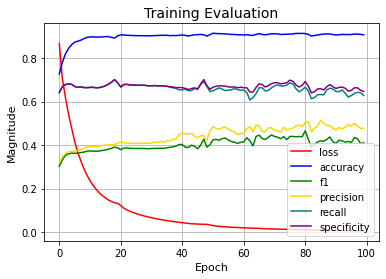

In [4]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

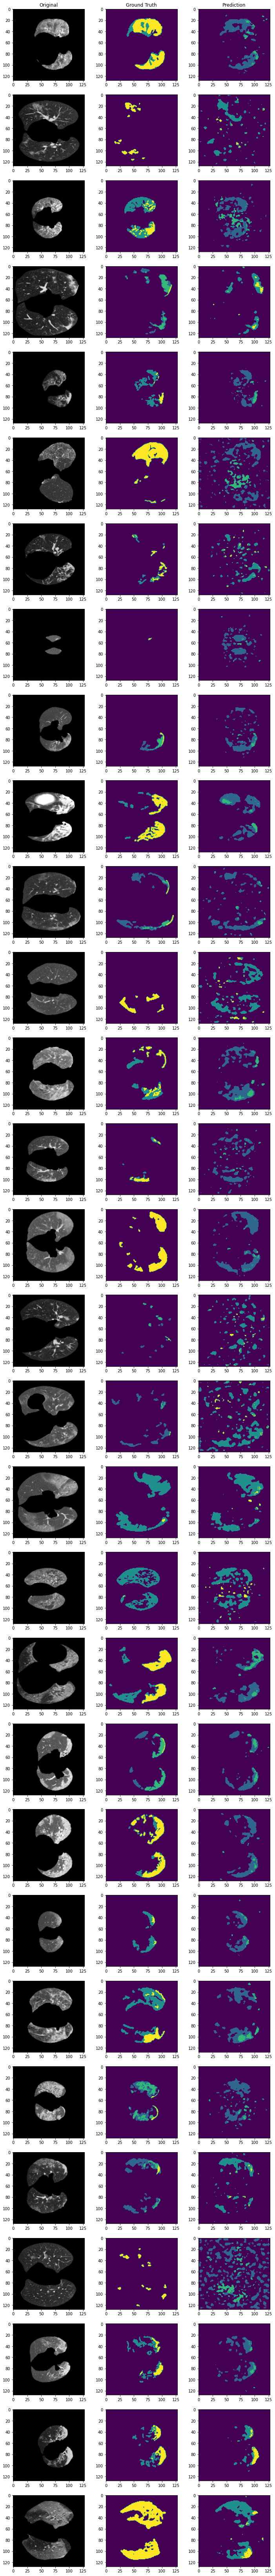

In [5]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    jaccard_score_2 = None
    jaccard_score_3 = None
    
    specificity_0 = None
    specificity_1 = None
    specificity_2 = None
    specificity_3 = None
    
    recall_0 = None
    recall_1 = None
    recall_2 = None
    recall_3 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    dice_2 = dice_score(mask_vectorized, prediction_vectorized, k=2)
    dice_3 = dice_score(mask_vectorized, prediction_vectorized, k=3)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
        elif i == 2:
            jaccard_score_2 = label_score[i]
        elif i == 3:
            jaccard_score_3 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
        elif i == 2:
            specificity_2    = label_specificity[i]
        elif i == 3:
            specificity_3    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        elif i == 2:
            recall_2 = label_recall[i]
        elif i == 3:
            recall_3 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'jaccard_score_2': jaccard_score_2,
        'jaccard_score_3': jaccard_score_3,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'specificity_2': specificity_2,
        'specificity_3': specificity_3,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'recall_2': recall_2,
        'recall_3': recall_3,
        'dice_0': dice_0,
        'dice_1': dice_1,
        'dice_2': dice_2,
        'dice_3': dice_3,
    })

plt.show()

In [6]:
df_scores = pd.DataFrame(scores)

df_scores

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
0,./tmp/test/images/i001.png,./tmp/test/masks/i001.tiff,0.269192,0.309541,0.859375,0.382979,0.583563,0.583563,0.928451,0.090772,...,0.061521,1.000000,0.982409,0.290323,0.061521,1.000000,0.397565,0.864242,0.075037,0.001316
1,./tmp/test/images/i005.png,./tmp/test/masks/i005.tiff,0.389655,0.448303,0.937012,0.419419,0.860643,0.895482,0.935909,0.233058,...,1.000000,1.000000,0.945361,0.636569,1.000000,NaN,0.189412,0.331765,0.000000,0.000000
2,./tmp/test/images/i010.png,./tmp/test/masks/i010.tiff,0.339050,0.400559,0.894714,0.397487,0.653980,0.653980,0.909175,0.413655,...,0.070136,1.000000,0.947817,0.597968,0.070136,1.000000,0.296359,0.621343,0.033677,0.000842
3,./tmp/test/images/i011.png,./tmp/test/masks/i011.tiff,0.332950,0.401352,0.938721,0.744137,0.401515,0.401515,0.960211,0.165103,...,0.219203,0.000000,0.981327,0.405530,0.219203,0.000000,0.311679,0.660584,0.211679,0.000000
4,./tmp/test/images/i013.png,./tmp/test/masks/i013.tiff,0.438203,0.526107,0.962280,0.512751,0.792434,0.792434,0.964227,0.470179,...,0.542373,1.000000,0.980303,0.647059,0.542373,1.000000,0.268390,0.555666,0.137177,0.000000
5,./tmp/test/images/i016.png,./tmp/test/masks/i016.tiff,0.219662,0.250551,0.791809,0.258749,0.554473,0.554473,0.829883,0.027536,...,0.029156,1.000000,0.882284,0.306452,0.029156,1.000000,0.518541,0.472902,0.032127,0.000300
6,./tmp/test/images/i019.png,./tmp/test/masks/i019.tiff,0.378550,0.436057,0.934021,0.417023,0.522887,0.642165,0.942262,0.166362,...,0.040909,1.000000,0.953619,0.574132,0.040909,NaN,0.253061,0.500000,0.019388,0.000000
7,./tmp/test/images/i023.png,./tmp/test/masks/i023.tiff,0.250046,0.272018,0.936646,0.266612,0.831457,0.831457,0.936939,0.008299,...,0.500000,1.000000,0.936939,0.888889,0.500000,1.000000,0.000000,0.030769,0.018803,0.000000
8,./tmp/test/images/i027.png,./tmp/test/masks/i027.tiff,0.334077,0.408656,0.944214,0.640318,0.501936,0.501936,0.951268,0.161809,...,0.279221,0.027778,0.955376,0.745370,0.279221,0.027778,0.100390,0.432794,0.168433,0.003346
9,./tmp/test/images/i031.png,./tmp/test/masks/i031.tiff,0.261612,0.304623,0.863037,0.384951,0.569514,0.569514,0.901224,0.062332,...,0.089943,1.000000,0.947949,0.240166,0.089943,1.000000,0.477956,0.635352,0.092707,0.000824


In [7]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,jaccard_score_2,jaccard_score_3,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,23.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,23.000000,30.000000,30.000000,30.000000,30.000000
mean,0.349186,0.410746,0.906934,0.476486,0.628101,0.646329,0.920508,0.254056,0.116816,0.001208,...,0.333250,0.734259,0.947718,0.570089,0.333250,0.653382,0.261225,0.527623,0.094835,0.000719
std,0.085694,0.103051,0.046318,0.135283,0.163942,0.166027,0.043912,0.169624,0.140253,0.005792,...,0.348326,0.448241,0.046028,0.175293,0.348326,0.485325,0.144616,0.200164,0.096062,0.001050
min,0.200607,0.237963,0.756287,0.258749,0.386198,0.386198,0.754240,0.008299,0.000000,0.000000,...,0.000000,0.000000,0.761330,0.240166,0.000000,0.000000,0.000000,0.030769,0.000000,0.000000
25%,0.276506,0.319819,0.886551,0.398151,0.504245,0.515070,0.903212,0.122419,0.008724,0.000000,...,0.046544,0.270833,0.939044,0.446470,0.046544,0.000000,0.122459,0.436112,0.018950,0.000000
50%,0.346229,0.411846,0.918396,0.451446,0.596393,0.651427,0.932527,0.232513,0.048783,0.000000,...,0.228522,1.000000,0.954852,0.588578,0.228522,1.000000,0.271031,0.550980,0.066403,0.000000
75%,0.390937,0.476051,0.938293,0.553758,0.772042,0.772042,0.943215,0.392824,0.203727,0.000000,...,0.496032,1.000000,0.979117,0.705025,0.496032,1.000000,0.367597,0.646774,0.153604,0.001220
max,0.543541,0.649813,0.965820,0.758990,0.930373,0.930373,0.969733,0.652662,0.471954,0.027778,...,1.000000,1.000000,0.992153,0.888889,1.000000,1.000000,0.518541,0.906436,0.382342,0.003916
